In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
# Cargar los datos
data = pd.read_csv("data_evaluacion.csv", header=None)

etiquetas = ['edad', 'tipo_empleado', 'fnlwgt', 'educacion', 'educacion_num', 
                 'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo', 
                 'capital_ganado', 'capital_perdido', 'hr_por_semana', 'pais', 'ganancia']
data.columns = etiquetas

def obtener_categorias(data, categoria):
    categorias = data[categoria].unique()
    return categorias

In [3]:
# Reemplazar las categorías en el DataFrame con valores numéricos
def categorize_employment(job_category):
    if job_category in ['State-gov', 'Federal-gov', 'Local-gov']:
        return 1  # Empleo Gubernamental
    elif job_category == 'Private':
        return 2  # Empleo Privado
    elif job_category in ['Self-emp-not-inc', 'Self-emp-inc']:
        return 3  # Empleo Independiente
    elif job_category == 'Without-pay':
        return 4  # Trabajo No Remunerado
    elif job_category == 'Never-worked':
        return 5  # No Empleo
    else:
        return np.nan  # Representa un dato desconocido

data['tipo_empleado'] = data['tipo_empleado'].apply(categorize_employment).astype('Int32')

In [4]:
def categorize_sex(sex_category):
    if sex_category == 'Male':
        return 1
    elif sex_category == 'Female':
        return 2
    else:
        return pd.NA  # Representa un dato desconocido

data['sexo'] = data['sexo'].apply(categorize_sex).astype('Int32')

In [5]:
def categorize_continent(country_category):
    if country_category in ['United-States', 'Canada', 'Mexico', 'Puerto-Rico', 'Outlying-US(Guam-USVI-etc)']:
        return 1  # América del Norte
    elif country_category in ['Cuba', 'Jamaica', 'Honduras', 'Columbia', 'Ecuador', 'Haiti', 
                              'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                              'Nicaragua', 'Trinadad&Tobago']:
        return 2  # América Latina y el Caribe
    elif country_category in ['England', 'Germany', 'Italy', 'Poland', 'Portugal', 'France', 
                              'Scotland', 'Ireland', 'Hungary', 'Greece', 'Netherlands', 
                              'Yugoslavia']:
        return 3  # Europa
    elif country_category in ['India', 'Iran', 'Philippines', 'Cambodia', 'Thailand', 'Laos', 
                              'Taiwan', 'China', 'Japan', 'Vietnam', 'Hong']:
        return 4  # Asia
    elif country_category in ['South', 'Nigeria']:
        return 5  # África
    else:
        return pd.NA  # Representa un dato desconocido

data['pais'] = data['pais'].apply(categorize_continent).astype('Int32')

In [6]:
def categorize_relationship(relationship_category):
    if relationship_category == 'Not-in-family':
        return 1
    elif relationship_category == 'Husband':
        return 2
    elif relationship_category == 'Wife':
        return 3
    elif relationship_category == 'Own-child':
        return 4
    elif relationship_category == 'Unmarried':
        return 5
    elif relationship_category == 'Other-relative':
        return 6
    else:
        return pd.NA  # Representa un dato desconocido

data['relacion'] = data['relacion'].apply(categorize_relationship).astype('Int32')

In [7]:
def categorize_civil_status(civil_status_category):
    if civil_status_category in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 1  # Casado
    elif civil_status_category in ['Never-married', 'Separated']:
        return 2  # No Casado
    elif civil_status_category == 'Divorced':
        return 3  # Divorciado
    elif civil_status_category == 'Widowed':
        return 4  # Viudo
    else:
        return pd.NA  # Representa un dato desconocido

data['estado_civil'] = data['estado_civil'].apply(categorize_civil_status).astype('Int32')

In [8]:
def categorize_race(race_category):
    if race_category == 'White':
        return 1
    elif race_category == 'Black':
        return 2
    elif race_category == 'Asian-Pac-Islander':
        return 3
    elif race_category == 'Amer-Indian-Eskimo':
        return 4
    elif race_category == 'Other':
        return 5
    else:
        return pd.NA  # Representa un dato desconocido

data['raza'] = data['raza'].apply(categorize_race).astype('Int32')

In [9]:
def categorize_education(education_category):
    if education_category in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 1  # Educación Básica
    elif education_category in ['HS-grad', '9th', '10th', '11th', '12th']:
        return 2  # Educación Secundaria
    elif education_category in ['Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors']:
        return 3  # Educación Técnica
    elif education_category in ['Prof-school', 'Masters', 'Doctorate']:
        return 4  # Educación Superior
    else:
        return pd.NA  # Representa un dato desconocido

data['educacion'] = data['educacion'].apply(categorize_education).astype('Int32')


In [10]:
def categorize_income(income_category):
    if income_category == '<=50K':
        return 1
    elif income_category == '>50K':
        return 2
    else:
        return pd.NA  # Representa un dato desconocido

data['ganancia'] = data['ganancia'].apply(categorize_income).astype('Int32')


In [11]:
def categorize_occupation(occupation_category):
    if occupation_category in ['Adm-clerical', 'Exec-managerial']:
        return 1  # Administración y Oficina
    elif occupation_category in ['Handlers-cleaners', 'Other-service', 'Sales', 'Tech-support', 'Priv-house-serv']:
        return 2  # Servicios
    elif occupation_category in ['Prof-specialty', 'Protective-serv']:
        return 3  # Especialidades Profesionales
    elif occupation_category in ['Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct']:
        return 4  # Mano de Obra y Transporte
    elif occupation_category == 'Armed-Forces':
        return 5  # Fuerzas Armadas
    else:
        return pd.NA  # Representa un dato desconocido

data['ocupacion'] = data['ocupacion'].apply(categorize_occupation).astype('Int32')

In [12]:
# Rellenar valores NaN
data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
data['ocupacion'].fillna(data['ocupacion'].mode()[0], inplace=True)
data['pais'].fillna(data['pais'].mode()[0], inplace=True)

X = data.drop(['ganancia'], axis=1)
y = data['ganancia']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformarlos
X_scaled = scaler.fit_transform(X)

# Convertir el array escalado de vuelta a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_11964\477401535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['tipo_empleado'].fillna(data['tipo_empleado'].mode()[0], inplace=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_11964\477401535.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Resultados para kernel: linear
Train Accuracy : 0.84270
Test Accuracy : 0.83839
Precisión del modelo: 0.8383948679451307
              precision    recall  f1-score   support

         1.0       0.86      0.94      0.90     11109
         2.0       0.74      0.51      0.60      3544

    accuracy                           0.84     14653
   macro avg       0.80      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653



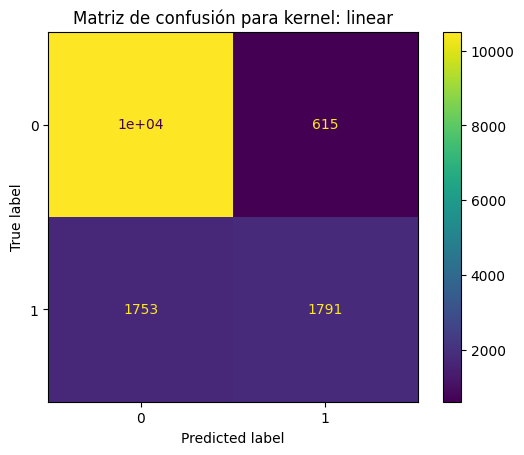

Resultados para kernel: poly
Train Accuracy : 0.84913
Test Accuracy : 0.83853
Precisión del modelo: 0.838531358766123
              precision    recall  f1-score   support

         1.0       0.85      0.96      0.90     11109
         2.0       0.78      0.47      0.58      3544

    accuracy                           0.84     14653
   macro avg       0.81      0.71      0.74     14653
weighted avg       0.83      0.84      0.82     14653



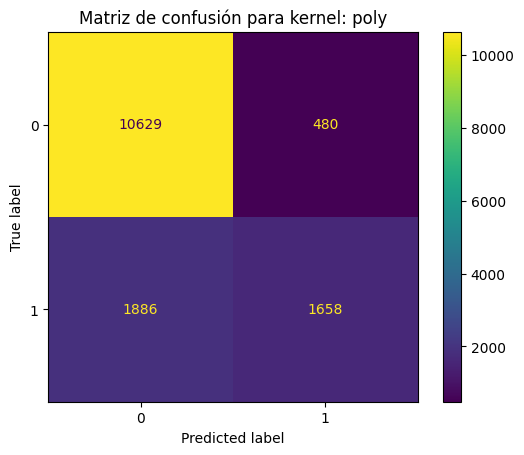

Resultados para kernel: rbf
Train Accuracy : 0.85864
Test Accuracy : 0.84836
Precisión del modelo: 0.8483586978775677
              precision    recall  f1-score   support

         1.0       0.87      0.95      0.90     11109
         2.0       0.76      0.54      0.63      3544

    accuracy                           0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653



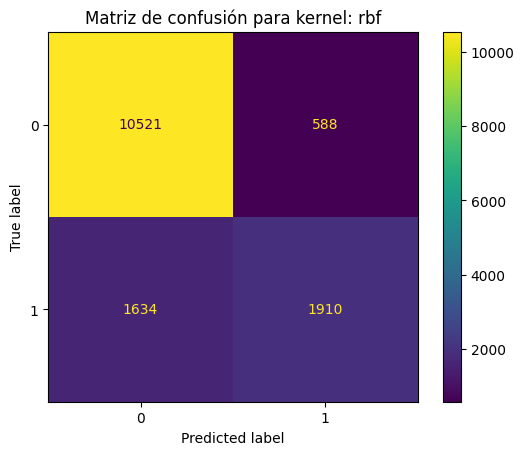

Resultados para kernel: sigmoid
Train Accuracy : 0.77215
Test Accuracy : 0.77213
Precisión del modelo: 0.7721285743533748
              precision    recall  f1-score   support

         1.0       0.85      0.85      0.85     11109
         2.0       0.53      0.52      0.52      3544

    accuracy                           0.77     14653
   macro avg       0.69      0.69      0.69     14653
weighted avg       0.77      0.77      0.77     14653



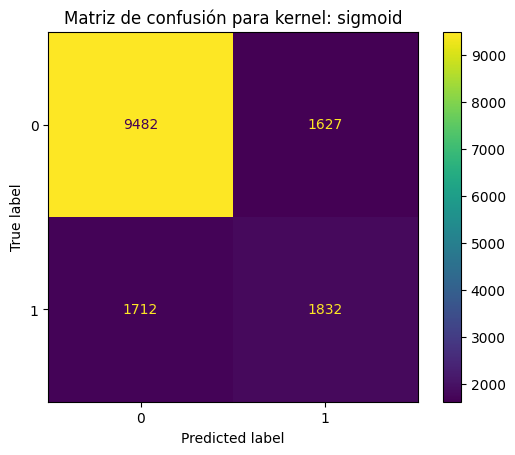

In [13]:
# Función para entrenar y evaluar SVM con diferentes kernels
def evaluar_svm(kernel):
    modelo = SVC(kernel=kernel, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f'Resultados para kernel: {kernel}')
    print('Train Accuracy : %.5f' % modelo.score(X_train, y_train))
    print('Test Accuracy : %.5f' % modelo.score(X_test, y_test))
    print("Precisión del modelo:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title(f'Matriz de confusión para kernel: {kernel}')
    plt.show()

# Evaluar SVM con los cuatro kernels diferentes
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    evaluar_svm(kernel)